In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd
from tqdm import tqdm

72992


# Packages:

require scanpy

# 1. define

In [2]:
fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329',
             'save_folder':r'\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

## 1.1 define required floders

In [3]:
save_folder = fov_param['save_folder']

save_filenames = [os.path.join(save_folder, _fl) for _fl in os.listdir(save_folder)
                  if _fl.split(os.extsep)[-1]=='hdf5']
# extract fov_id
save_fov_ids = [int(os.path.basename(_fl).split('.hdf5')[0].split('_')[-1]) for _fl in save_filenames]

debug = False

print(f"{len(save_filenames)} fovs detected")

segmentation_folder = os.path.join(save_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)
    print(f"Creating segmentation_folder: {segmentation_folder}")
else:
    print(f"Use segmentation_folder: {segmentation_folder}")

cand_spot_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spot_folder):
    os.makedirs(cand_spot_folder)
    print(f"Creating cand_spot_folder: {cand_spot_folder}")
else:
    print(f"Use cand_spot_folder: {cand_spot_folder}")

decoder_folder = cand_spot_folder.replace('CandSpots', 'Decoder')
if debug:
    _version = 0
    while os.path.exists(os.path.join(decoder_folder, f'v{_version}')):
        _version += 1
    decoder_folder = os.path.join(decoder_folder, f'v{_version}')
if not os.path.exists(decoder_folder):
    os.makedirs(decoder_folder)
    print(f"Creating decoder_folder: {decoder_folder}")
else:
    print(f"Use decoder_folder: {decoder_folder}")


161 fovs detected
Use segmentation_folder: \\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Segmentation
Use cand_spot_folder: \\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\CandSpots
Use decoder_folder: \\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Decoder


In [4]:
save_figure = True
#figure_folder = os.path.join(save_folder, 'Figures_final')
figure_folder = os.path.join(decoder_folder, 'Figures_final')
if not os.path.exists(figure_folder):
    print(f"Create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"Use figure_folder: {figure_folder}")

Use figure_folder: \\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Decoder\Figures_final


## 1.2 get dict for cell uid

In [5]:
%%time
fovcell_2_uid = {}

for _fov_id, _save_filename in zip(save_fov_ids, save_filenames):
    # segmentation filename
    _segmentation_savefile = os.path.join(segmentation_folder, 
        os.path.basename(_save_filename).replace('.hdf5', '_Segmentation.hdf5') )
    
    with h5py.File(_segmentation_savefile, 'r') as _f:
        for _fov_id in _f.keys():
            _fov_group = _f[_fov_id]
            _uid_group = _fov_group['cell_2_uid']
            for _cell_id in _uid_group.keys():
                fovcell_2_uid[(_fov_id, _cell_id)] = _uid_group[_cell_id][:][0].decode()
    print(len(fovcell_2_uid))

142
263
396
538
686
849
994
1138
1289
1454
1620
1763
1909
2052
2179
2302
2435
2551
2678
2778
2905
3019
3141
3262
3408
3537
3694
3811
3938
4061
4182
4245
4306
4379
4464
4626
4779
4918
5036
5185
5320
5474
5625
5766
5876
6015
6160
6316
6483
6625
6740
6849
6957
7067
7212
7328
7435
7528
7647
7768
7894
8028
8183
8343
8467
8600
8745
8889
9036
9185
9297
9383
9447
9476
9533
9631
9732
9747
9821
9887
9955
10021
10074
10184
10290
10399
10511
10612
10740
10855
10965
11090
11222
11325
11414
11514
11607
11712
11805
11912
12009
12120
12244
12349
12448
12552
12669
12791
12860
12988
13137
13290
13435
13583
13724
13857
13980
14117
14238
14374
14525
14529
14622
14692
14738
14746
14830
14931
15046
15174
15274
15410
15528
15643
15771
15904
16023
16125
16235
16334
16430
16524
16647
16754
16858
16962
17079
17217
17362
17488
17624
17718
17835
17954
18096
18257
18393
18531
18676
18808


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Segmentation\Conv_zscan_160_Segmentation.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## 1.3 get cell_uid to cell-class

In [6]:
%%time
import scanpy as sc

# load cell type info
merfish_cluster_file = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\20220329-M1_renamed\PostAnalysis\manual_labeled_data.h5ad'

merfish_df = sc.read_h5ad(merfish_cluster_file)

uid_2_class = {_uid:_class for _uid, _class in zip(merfish_df.obs.index, merfish_df.obs['subclass_manual_label'])}

Wall time: 6.36 s


# 2. export spot_groups

In [60]:
%%time
from ImageAnalysis3.classes import decode
# loop through fovs
load_key = 'spot_groups'
# save into file
export_decode_folder = r'D:\Pu_Temp\20220402-Export'

overwrite_export = False

#SpotGroupDfs = []
for _fov_id in save_fov_ids:
    _export_filename = os.path.join(export_decode_folder, f"DecodeGroup_Fov-{_fov_id}.hdf5")
    print(_export_filename)
    if os.path.exists(_export_filename) and not overwrite_export:
        continue
    _cell_ids = [_g[1] for _g in fovcell_2_uid.keys() if str(_g[0])==str(_fov_id)]
    for _cell_id in tqdm(_cell_ids):
        _decoder_filename = os.path.join(decoder_folder, 
                                         f"Fov-{_fov_id}_Cell-{_cell_id}_Decoder.hdf5")
        if os.path.isfile(_decoder_filename):
            #print(_fov_id, _cell_id)
            # save EM picked spots
            _chr_2_zxys_list = ia.classes.decode.load_hdf5_dict(_decoder_filename, 'chr_2_zxys_list')
            if isinstance(_chr_2_zxys_list, dict):
                ia.classes.decode.save_hdf5_dict(_export_filename, f"Cell_{_cell_id}_EM", _chr_2_zxys_list)
            # save EM picked spot_group_ids
            chr_2_indices_list = ia.classes.decode.load_hdf5_dict(_decoder_filename, 'chr_2_indices_list')
            if isinstance(chr_2_indices_list, dict):
                ia.classes.decode.save_hdf5_dict(_export_filename, f"Cell_{_cell_id}_EM_indices", chr_2_indices_list)

            # dataframe for spot_groups
            _df = pd.read_hdf(_decoder_filename, load_key)
            _uid = fovcell_2_uid[(str(_fov_id), _cell_id)]
            _df['uid'] = _uid
            # merfish class
            _class = merfish_df.obs.loc[merfish_df.obs.index==_uid,'subclass_manual_label'].values
            if len(_class) == 0:
                _df['manual_class'] = None
            else:
                _df['manual_class'] = _class[0]
            # update homolog and spot_usage
            _group_usage = np.zeros(len(_df),dtype=bool)
            _homologs = np.zeros(len(_df),dtype=np.int32)
            if isinstance(chr_2_indices_list, dict):
                for _chr, _inds_list in chr_2_indices_list.items():
                    for _ihomo, _inds in enumerate(_inds_list):
                        for _ind in _inds:
                            if _ind >= 0:
                                _group_usage[_ind] += 1
                                _homologs[_ind] = _ihomo
                _df['homolog'] = _homologs
                _df['group_usage'] = _group_usage
            # save this df
            _df.to_hdf(_export_filename, f"Cell_{_cell_id}", complevel=1, complib='blosc:zstd')
            # append
            #SpotGroupDfs.append(_df)

D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-0.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-1.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-2.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-3.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-4.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-5.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-6.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-7.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-8.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-9.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-10.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-11.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-12.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-13.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-14.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-15.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-16.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-17.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-18.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fo

100%|█████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-36.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-37.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-38.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-39.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-40.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-41.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-42.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-43.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-44.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-45.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-46.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-47.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-48.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-49.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-50.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-51.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-52.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-53.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-54.hdf5
D:\Pu_Temp\20220316-Export\Deco

100%|█████████████████████████████████████████████████████████████████████████████| 148/148 [00:18<00:00,  7.99it/s]

D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-129.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-130.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-131.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-132.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-133.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-134.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-135.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-136.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-137.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-138.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-139.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-140.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-141.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-142.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-143.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-144.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-145.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-146.hdf5
D:\Pu_Temp\20220316-Export\DecodeGroup_Fov-147.hdf5
D:\Pu_Temp\2

# 3. load chr_2_zxys_list

## 3.1 load codebook

In [10]:
# load two codebooks
codebook_gn = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv', header=0)
codebook_se = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\Summary_tables\CTP13-super-enhancers-1000_codebook.csv', header=0)
codebook_se['id'] = codebook_se['id'] + np.max(codebook_gn['id'])

In [11]:
# combine region_ids
merged_codebook = pd.concat([codebook_gn, codebook_se], axis=0, join='outer',ignore_index=True).fillna(0)

merged_codebook['reg_start'] = [int(_name.split(':')[1].split('-')[0]) for _name in merged_codebook['name']]
merged_codebook['reg_end'] = [int(_name.split(':')[1].split('-')[1]) for _name in merged_codebook['name']]
merged_codebook['reg_mid'] = (merged_codebook['reg_start'] + merged_codebook['reg_end'])/2

for _chr in np.unique(merged_codebook['chr']):
    _chr_codebook = merged_codebook[merged_codebook['chr']==_chr]
    _reg_order = np.argsort(merged_codebook.loc[merged_codebook['chr']==_chr, 'reg_mid'])
    merged_codebook.loc[_chr_codebook.index[_reg_order], 'chr_order'] = np.arange(len(_chr_codebook))
    
# cleanup 
codebook_df = merged_codebook[[_c for _c in merged_codebook.columns if 'reg_' not in _c]]

In [12]:
gn_inds = np.array([list(codebook_df['id']).index(_i) for _i in codebook_gn['id']])
se_inds = np.array([list(codebook_df['id']).index(_i) for _i in codebook_se['id']])

## 3.2 load chr_2_zxys_list

In [13]:
import re
import multiprocessing as mp
from ImageAnalysis3.classes.decode import load_hdf5_dict
from ImageAnalysis3.classes.decode import DNA_Merfish_Decoder

#decoder_folder = os.path.join(save_folder, 'Decoder')
decoder_filenames = [os.path.join(decoder_folder, _fl) for _fl in os.listdir(decoder_folder) 
                     if '_Decoder.hdf5' in _fl]
print(decoder_folder, len(decoder_filenames))

\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Decoder 16959


In [14]:
%%time
overwrite_coodinates=False

print("Batch load chr_2_zxys_list")
# Batch loading
load_args = [(_fl, 'chr_2_zxys_list') for _fl in decoder_filenames]
print(len(load_args))
with mp.Pool(44) as load_pool:
    all_chr_2_zxys_list = load_pool.starmap(load_hdf5_dict, 
                                            load_args, 
                                            chunksize=1)
    load_pool.close()
    load_pool.join()
    load_pool.terminate()
    
# Batch summarize
kept_decoder_filenames = [_fl for _fl,_item in zip(decoder_filenames, all_chr_2_zxys_list) if _item is not None]
all_chr_2_zxys_list = [_item for _item in all_chr_2_zxys_list if _item is not None]
print(len(kept_decoder_filenames), len(all_chr_2_zxys_list))
# UIDs    
uid_list = [fovcell_2_uid[
    re.findall(r'Fov-([0-9]+)_Cell-([0-9]+)_Decoder.hdf5', os.path.basename(_fl))[0]
           ] for _fl in kept_decoder_filenames]

Batch load chr_2_zxys_list
16959
16925 16925
Wall time: 48.9 s


## 3.3 split chr_zxys into classes

In [15]:
class_2_chr_zxys = {}
for _class in np.unique(merfish_df.obs['subclass_manual_label']):
    if _class not in class_2_chr_zxys:
        class_2_chr_zxys[_class] = []
    for _uid, _chr_zxys in zip(uid_list, all_chr_2_zxys_list):
        
        if _uid in uid_2_class and uid_2_class[_uid] == _class:
            class_2_chr_zxys[_class].append(_chr_zxys)
    print(_class, len(class_2_chr_zxys[_class]))      
# save
save_class_2_chr_zxys = os.path.join(decoder_folder, f"class_2_chr_zxys_n{len(all_chr_2_zxys_list)}.pkl")
print(save_class_2_chr_zxys)
pickle.dump(class_2_chr_zxys, open(save_class_2_chr_zxys, 'wb'))

Astro 1011
Endo 756
L2/3 IT 1114
L4/5 IT 731
L5 ET 362
L5 IT 550
L5/6 NP 159
L6 CT 1611
L6 IT 577
L6b 273
Lamp5 112
Micro 317
OPC 358
Oligo 1156
Other 1221
Peri 185
Pvalb 395
SMC 187
Sncg 76
Sst 291
VLMC 70
Vip 114
\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Decoder\class_2_chr_zxys_n16925.pkl


In [17]:
%%time
from ImageAnalysis3.structure_tools import distance
reload(distance)
class_2_summary_dict = {
    _class:distance.Chr2ZxysList_2_summaryDict(_chr_2_zxys_list, codebook_df, verbose=True) 
    for _class, _chr_2_zxys_list in class_2_chr_zxys.items() if _class not in ['Other']
}

-- preparing chr_2_zxys from 1011 cells in 0.110s.
-- summarize 231 inter-chr distances with 12 threads in 66.213s.
-- preparing chr_2_zxys from 756 cells in 0.095s.
-- summarize 231 inter-chr distances with 12 threads in 53.191s.
-- preparing chr_2_zxys from 1114 cells in 0.153s.
-- summarize 231 inter-chr distances with 12 threads in 67.140s.
-- preparing chr_2_zxys from 731 cells in 0.084s.
-- summarize 231 inter-chr distances with 12 threads in 48.846s.
-- preparing chr_2_zxys from 362 cells in 0.042s.
-- summarize 231 inter-chr distances with 12 threads in 29.956s.
-- preparing chr_2_zxys from 550 cells in 0.062s.
-- summarize 231 inter-chr distances with 12 threads in 39.217s.
-- preparing chr_2_zxys from 159 cells in 0.018s.
-- summarize 231 inter-chr distances with 12 threads in 20.548s.
-- preparing chr_2_zxys from 1611 cells in 0.245s.
-- summarize 231 inter-chr distances with 12 threads in 99.837s.
-- preparing chr_2_zxys from 577 cells in 0.068s.
-- summarize 231 inter-chr 

## 3.4 plot cell-type cis-trans

In [ ]:
%matplotlib inline

plt.style.use('dark_background')
_single_im_size=3
sel_codebook = codebook_df
sort_by_region = True

for _class, summary_dict in class_2_summary_dict.items():
    
    _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
        summary_dict, codebook_df, 
        sel_codebook=sel_codebook, 
        use_cis=True, sort_by_region=sort_by_region,
    )
    _trans_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
        summary_dict, codebook_df, 
        sel_codebook=sel_codebook, 
        use_cis=False, sort_by_region=sort_by_region,
    )

    fig, axes = plt.subplots(1, 2, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=300, sharex=True, sharey=True)

    ia.figure_tools.distmap.plot_distance_map(_cis_mat/1000, color_limits=[0,5],
                                              ax=axes[0], 
                                                ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                              tick_labels=chr_names,
                                              font_size=6.5)
    ia.figure_tools.distmap.plot_distance_map(_trans_mat/1000, color_limits=[2,6],
                                              ax=axes[1], 
                                              ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                              tick_labels=chr_names, 
                                              font_size=6.5)

    axes[0].set_title(f'cis', fontsize=7.5, pad=2)
    axes[1].set_title(f'trans', fontsize=7.5, pad=2)
    for _ax in axes:
        _ax.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
        _ax.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
        _ax.xaxis.set_tick_params(which='both', labelbottom=True)
        _ax.yaxis.set_tick_params(which='both', labelleft=True)
    
    fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
    fig.suptitle(f"{_class}, N={len(class_2_chr_zxys[_class])}", fontsize=10, y=0.97)
    fig.savefig(os.path.join(figure_folder, f"cis-trans-median_distmap_byreg_{_class.replace('/','_')}.png"))
    fig.show()

In [ ]:
%matplotlib inline

plt.style.use('dark_background')
_single_im_size=3
sel_codebook = codebook_df
sort_by_region = False

for _class, summary_dict in class_2_summary_dict.items():
    
    _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
        summary_dict, codebook_df, 
        sel_codebook=sel_codebook, 
        use_cis=True, sort_by_region=sort_by_region,
    )
    _trans_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
        summary_dict, codebook_df, 
        sel_codebook=sel_codebook, 
        use_cis=False, sort_by_region=sort_by_region,
    )

    fig, axes = plt.subplots(1, 2, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=300, sharex=True, sharey=True)

    ia.figure_tools.distmap.plot_distance_map(_cis_mat/1000, color_limits=[0,6],
                                              ax=axes[0], 
                                                ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                              tick_labels=chr_names,
                                              font_size=6.5)
    ia.figure_tools.distmap.plot_distance_map(_trans_mat/1000, color_limits=[2,6],
                                              ax=axes[1], 
                                              ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                              tick_labels=chr_names, 
                                              font_size=6.5)

    axes[0].set_title(f'cis', fontsize=7.5, pad=2)
    axes[1].set_title(f'trans', fontsize=7.5, pad=2)
    for _ax in axes:
        _ax.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
        _ax.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
        _ax.xaxis.set_tick_params(which='both', labelbottom=True)
        _ax.yaxis.set_tick_params(which='both', labelleft=True)
    
    fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
    fig.suptitle(f"{_class}, N={len(class_2_chr_zxys[_class])}", fontsize=10, y=0.97)
    fig.savefig(os.path.join(figure_folder, f"cis-trans-median_distmap_bychr_{_class.replace('/','_')}.png"))
    fig.show()

## 3.5 plot cis for all types

In [29]:

visualize_chr = True

sort_by_region = False

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, sel_codebook, sort_by_region=sort_by_region)


In [ ]:
%matplotlib inline
_single_im_size=1.25
_num_cols = 7
_num_rows =  int(np.ceil(len(class_2_summary_dict)/_num_cols))
fig, axes_list = plt.subplots(_num_rows, _num_cols, 
                              figsize=(_single_im_size*_num_cols, _single_im_size*_num_rows*1.1), 
                              dpi=125,
                              sharex=True, sharey=True)
class_names = list(class_2_summary_dict.keys())
_plot_id = 0
for _row_axes in axes_list:
    for _ax in _row_axes:
        if _plot_id >= len(class_names):
            continue
        _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(class_2_summary_dict[class_names[_plot_id]], 
                                                          codebook_df, use_cis=True, sort_by_region=sort_by_region)
        _ax = ia.figure_tools.distmap.plot_distance_map(
            _cis_mat/1000, color_limits=[0.5, 4],
            ticks=(chr_edges[1:] + chr_edges[:-1])/2,
            tick_labels=chr_names,
            font_size=6.5,
            ax=_ax,)
        _ax.set_title(f"{class_names[_plot_id]}, N={len(class_2_chr_zxys[class_names[_plot_id]])}", 
                      fontsize=7.5, pad=2)
        _ax.hlines(chr_edges, 0, len(_cis_mat), color='black', linewidth=0.25)
        _ax.vlines(chr_edges, 0, len(_cis_mat), color='black', linewidth=0.25)
        _ax.xaxis.set_tick_params(which='both', labelbottom=True)
        _ax.yaxis.set_tick_params(which='both', labelleft=True)
        # next plot
        _plot_id += 1
        
fig.subplots_adjust(wspace=0.15, hspace=0.15, left=0.02, right=0.97, top=0.97, bottom=0.02)


if visualize_chr:
    sel_chr = '7'
    sel_chr_inds = chr_2_indices[sel_chr]
    _ax.set_xlim([min(sel_chr_inds), max(sel_chr_inds)])
    _ax.set_ylim([ max(sel_chr_inds), min(sel_chr_inds)])
    fig.savefig(os.path.join(figure_folder, f"all_type_cis_median_distmap_chr-{sel_chr}.png"),
                tranparent=True)
else:
    fig.savefig(os.path.join(figure_folder, f"all_type_cis_median_distmap.png"),
                tranparent=True)
fig.show()

# 4. calculate loss-rate per region (NOT FINISHED)

In [20]:
from ImageAnalysis3.structure_tools import distance

In [21]:
sel_codebook = codebook_df
sort_by_region = True

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, sel_codebook, sort_by_region=sort_by_region)
chr_edges, chr_names = distance.generate_plot_chr_edges(sel_codebook, chr_2_indices, sort_by_region=sort_by_region)

In [22]:
chr_2_loss_rates = {}
for _chr in np.unique(sel_codebook['chr']):
    print(_chr)
    _chr_zxys = [_d.get(_chr) for _d in all_chr_2_zxys_list if _chr in _d and len(_d.get(_chr)) > 0]
    if len(_chr_zxys) > 0:
        _chr_zxys = np.concatenate(_chr_zxys)
        chr_2_loss_rates[_chr] = np.isnan(_chr_zxys).any(2).mean(axis=0)

1
10
11
12
13
14
15
16
17
18
19
2
3
4
5
6
7
8
9
X
Y


In [23]:
# get losss-rate vector
loss_rates = np.ones(len(sel_codebook)) * np.nan
for _chr, _rates in chr_2_loss_rates.items():
    loss_rates[chr_2_indices[_chr]] = _rates[chr_2_orders[_chr]]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_72992/161636188.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


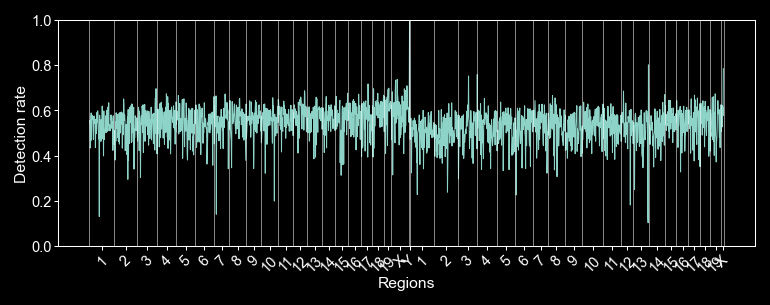

In [24]:
fig, ax = plt.subplots(figsize=(6,2),dpi=150)
_l = ax.plot(1-loss_rates, linewidth=0.5)
ax.set_ylim([0,1])
ax.set_xlabel('Regions', labelpad=1, fontsize=7.5)
ax.set_ylabel('Detection rate', labelpad=1, fontsize=7.5)
# border
[i[1].set_linewidth(0.5) for i in ax.spines.items()]
# ticks
ax.tick_params('both', labelsize=7, 
               width=0.5, length=2,
               pad=1)
ax.vlines(chr_edges-0.5, 0, 1, linewidth=0.25)
ax.set_xticks((chr_edges[1:] + chr_edges[:-1])/2)
ax.set_xticklabels(chr_names, rotation=45)
fig.show()

# 5. Calculate emsumble median distance (NOT finished ,change structure of this part )


In [26]:
%%time
from ImageAnalysis3.structure_tools import distance
reload(distance)
all_summary_dict = distance.Chr2ZxysList_2_summaryDict(all_chr_2_zxys_list, codebook_df, verbose=True)

-- preparing chr_2_zxys from 16925 cells in 2.068s.
-- summarize 231 inter-chr distances with 12 threads in 1623.211s.
Wall time: 27min 5s


In [21]:
# save
save_all_summary_dict = os.path.join(decoder_folder, f"all_summary_dict_n{len(all_chr_2_zxys_list)}.pkl")
print(save_all_summary_dict)
pickle.dump(all_summary_dict, open(save_all_summary_dict, 'wb'))

\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Decoder\all_summary_dict_n2551.pkl


## 5.1 plot

In [22]:
_ordered_chr_names = []
for _chr_name, _chr_reg_id in zip(codebook_df['chr'], codebook_df['chr_order']):
    if _chr_name not in _ordered_chr_names:
        _ordered_chr_names.append(_chr_name)
chr_2_indices = {_chr:np.array(codebook_df.loc[codebook_df['chr']==_chr].index)
                for _chr in np.unique(codebook_df['chr'].values)}

_labels_edges = np.array([0] + [np.max(chr_2_indices[_chr]) for _chr in _ordered_chr_names])

# Plot total median distmap

C:\Users\puzheng\AppData\Local\Temp/ipykernel_22068/3337029207.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


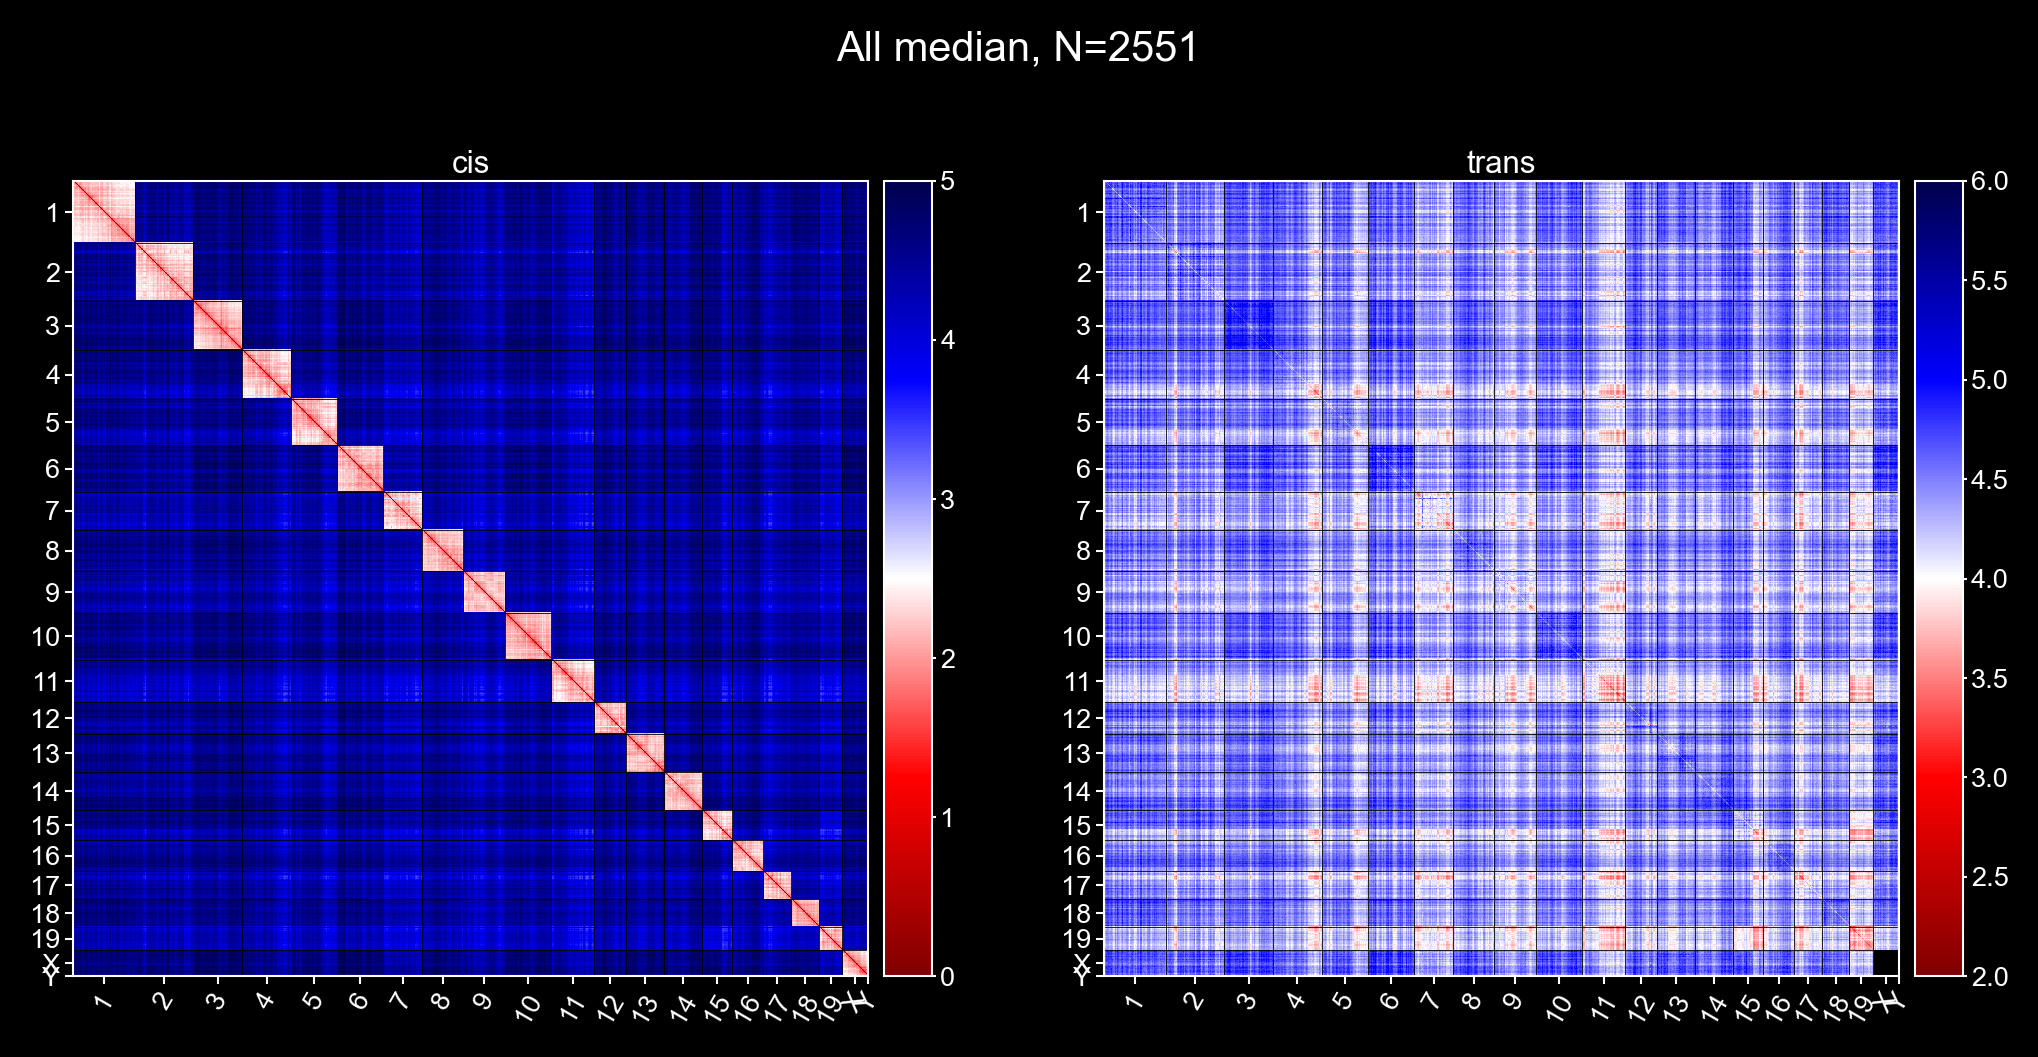

In [23]:
%matplotlib inline

plt.style.use('dark_background')
_single_im_size=3.5
sel_codebook = codebook_df
sort_by_region = False

_cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
    all_summary_dict, codebook_df, 
    sel_codebook=sel_codebook, 
    use_cis=True, sort_by_region=sort_by_region,
)
_trans_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
    all_summary_dict, codebook_df, 
    sel_codebook=sel_codebook, 
    use_cis=False, sort_by_region=sort_by_region,
)

fig, axes = plt.subplots(1, 2, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=300, sharex=True, sharey=True)

ia.figure_tools.distmap.plot_distance_map(_cis_mat/1000, color_limits=[0,5],
                                          ax=axes[0], 
                                            ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names,
                                          font_size=6.5)
ia.figure_tools.distmap.plot_distance_map(_trans_mat/1000, color_limits=[2,6],
                                          ax=axes[1], 
                                          ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names, 
                                          font_size=6.5)

axes[0].set_title(f'cis', fontsize=7.5, pad=2)
axes[1].set_title(f'trans', fontsize=7.5, pad=2)
for _ax in axes:
    _ax.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)

fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
fig.suptitle(f"All median, N={len(all_chr_2_zxys_list)}", fontsize=10, y=0.97)
fig.savefig(os.path.join(figure_folder, f"cis-trans-median_distmap_bychr_all.png"))
fig.show()

C:\Users\puzheng\AppData\Local\Temp/ipykernel_72992/4109411198.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


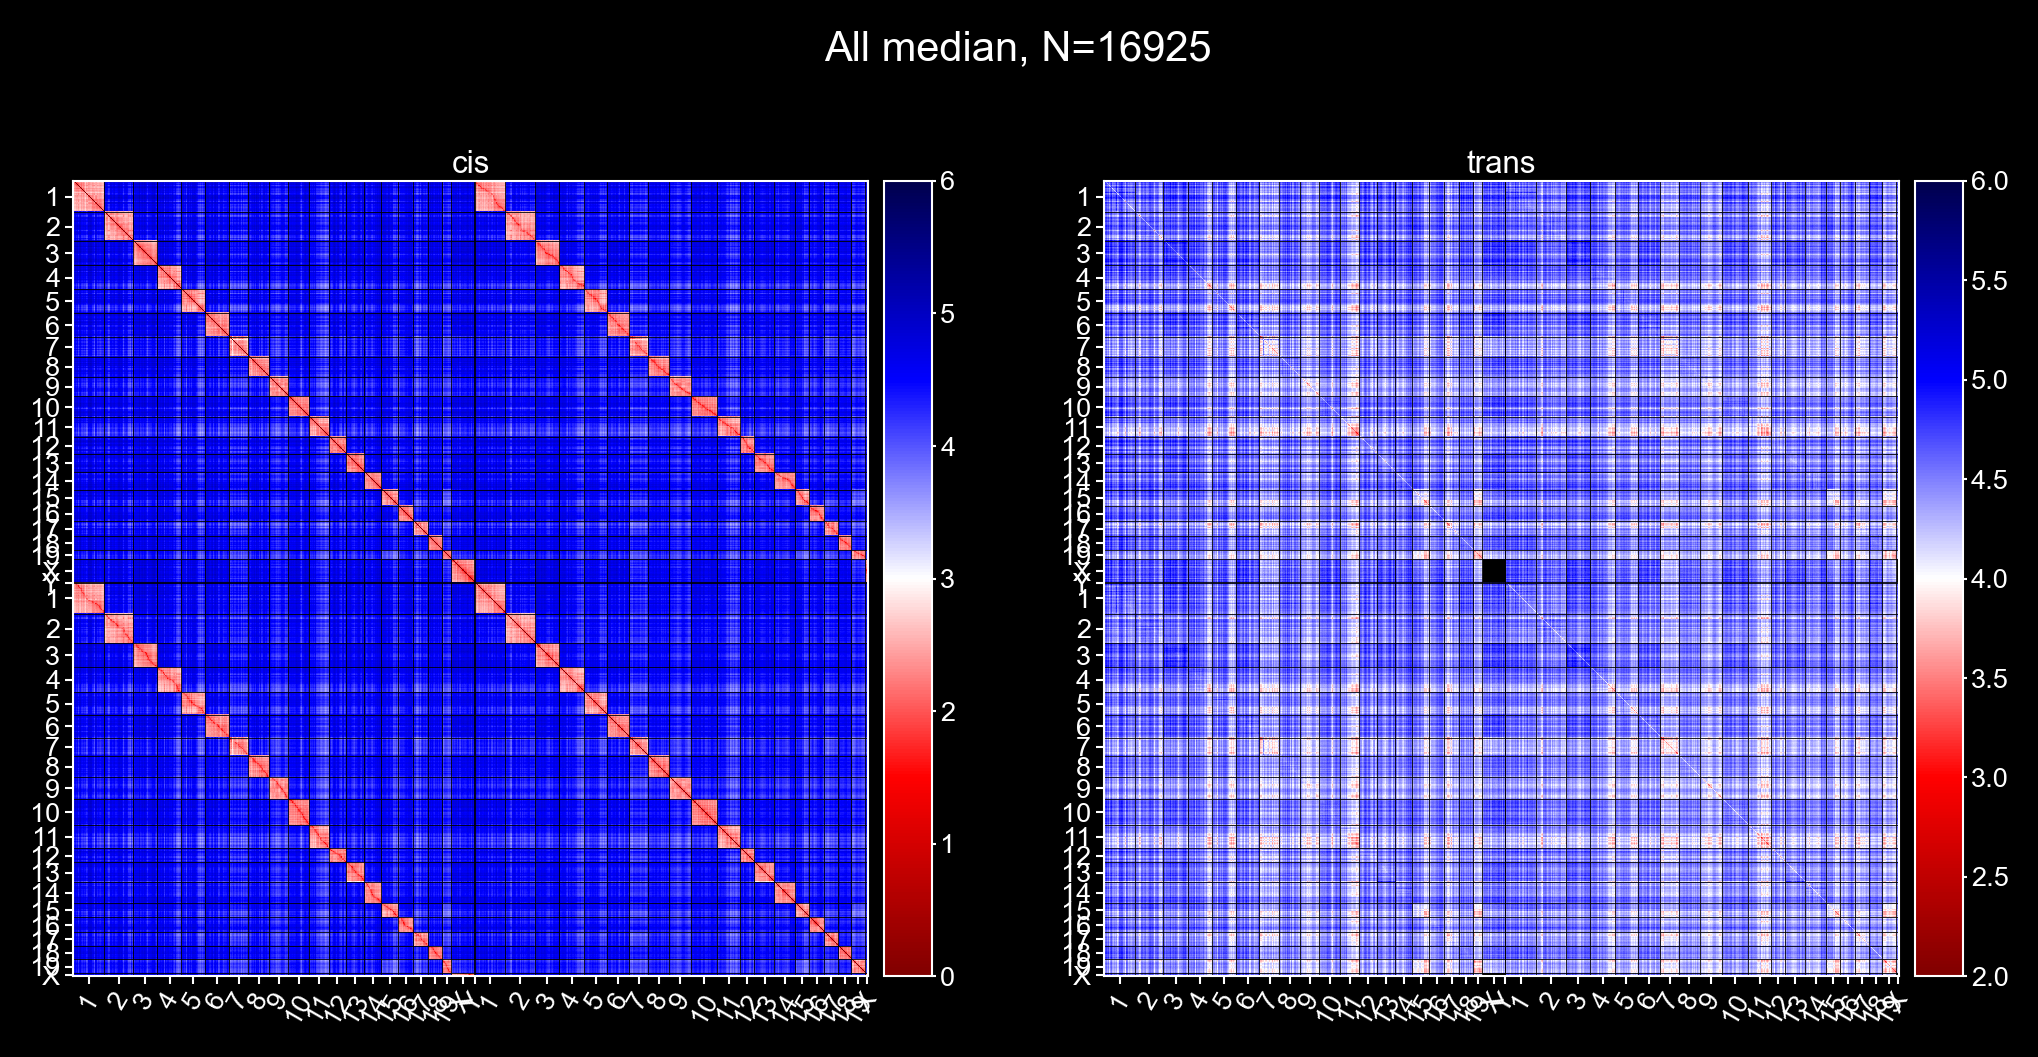

In [27]:
%matplotlib inline

plt.style.use('dark_background')
_single_im_size=3.5
sel_codebook = codebook_df
sort_by_region = True

_cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
    all_summary_dict, codebook_df, 
    sel_codebook=sel_codebook, 
    use_cis=True, sort_by_region=sort_by_region,
)
_trans_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
    all_summary_dict, codebook_df, 
    sel_codebook=sel_codebook, 
    use_cis=False, sort_by_region=sort_by_region,
)

fig, axes = plt.subplots(1, 2, figsize=(_single_im_size*2, _single_im_size*1.1), dpi=300, sharex=True, sharey=True)

ia.figure_tools.distmap.plot_distance_map(_cis_mat/1000, color_limits=[0,6],
                                          ax=axes[0], 
                                            ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names,
                                          font_size=6.5)
ia.figure_tools.distmap.plot_distance_map(_trans_mat/1000, color_limits=[2,6],
                                          ax=axes[1], 
                                          ticks=(chr_edges[1:] + chr_edges[:-1])/2,
                                          tick_labels=chr_names, 
                                          font_size=6.5)

axes[0].set_title(f'cis', fontsize=7.5, pad=2)
axes[1].set_title(f'trans', fontsize=7.5, pad=2)
for _ax in axes:
    _ax.hlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.vlines(chr_edges-0.5, 0, len(_cis_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)

fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, top=0.97, bottom=0.02)
fig.suptitle(f"All median, N={len(all_chr_2_zxys_list)}", fontsize=10, y=0.97)
fig.savefig(os.path.join(figure_folder, f"cis-trans-median_distmap_byreg_all.png"))
fig.show()